In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
vgg16 = models.vgg16(pretrained=True).to(device)
resnet50 = models.resnet50(pretrained=True).to(device)

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

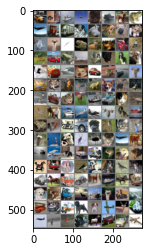

  car   cat  ship plane   cat  ship horse  frog plane truck truck   dog  bird  frog  bird   dog   cat  bird plane  frog  deer plane   car  bird  deer   car  frog plane   cat   dog   dog   cat   cat   car  ship   dog   car  frog  ship  bird plane  frog  bird  deer  frog   dog  deer  deer  bird truck   cat horse  ship  ship   cat  deer  bird horse  ship  ship plane plane   dog  ship  frog   cat truck   car  bird  bird   cat  bird  bird  bird  bird  deer  bird   cat plane  deer  ship plane   dog   car truck  frog   dog  frog horse   car   dog  bird   dog   cat  bird   cat truck horse truck truck   dog  ship horse truck   dog  deer truck  deer  ship  bird truck plane truck   car truck   dog   dog plane  deer truck plane  deer  bird  bird horse   car   car plane


In [8]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [9]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.SGD(resnet50.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        ## resnet
        # outputs = resnet50(inputs.to(device))
        outputs = vgg16(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Finished Training


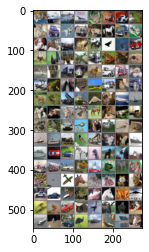

GroundTruth:    cat  ship  ship plane


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
## resnet
# outputs = resnet50(images.to(device))
outputs = vgg16(images.to(device))

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

Predicted:    cat  ship  ship  ship  frog  frog   car  frog   cat   car plane truck   dog horse truck  frog   dog horse  ship  frog horse plane  deer truck  deer  bird  deer plane truck  frog  frog   dog  deer   cat truck truck  deer   car truck   dog  deer  frog horse  frog plane truck   cat  ship  deer  frog truck  ship horse   cat  ship  ship horse   dog   dog   cat horse   dog  frog   cat  frog  bird   car  bird  deer horse  bird  frog  ship  ship plane  bird plane   cat   dog  ship  ship   car   car horse  bird horse   dog horse  ship truck plane   cat  ship  frog  deer  frog  frog plane plane   dog  deer   dog  frog   cat   car   car  bird  frog  ship horse  deer plane  frog  bird   car   cat plane  deer   cat horse  ship   cat   car  bird  ship  bird  ship   cat


In [14]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        ## resnet
        # outputs = resnet50(images.to(device))
        outputs = vgg16(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label.cpu() == prediction.cpu():
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 84.6 %
Accuracy for class car   is: 91.7 %
Accuracy for class bird  is: 77.6 %
Accuracy for class cat   is: 66.6 %
Accuracy for class deer  is: 81.9 %
Accuracy for class dog   is: 67.8 %
Accuracy for class frog  is: 85.5 %
Accuracy for class horse is: 82.5 %
Accuracy for class ship  is: 86.8 %
Accuracy for class truck is: 85.6 %
